# <center> UE22CS342AA2 - Data Analytics </center>

# <center> Worksheet 4b : Association rule mining (Market Basket Analysis) </center>

<center> Designed by Amritha GK, PESU-25 </center>

<br>

- Student name: Aditya P
- SRN: PES1UG22CS040
- Section: 'A'

Assume that you travel to another parallel universe, where your alter-ego owns a side-hustle retail store. You decide to take up an exercise on association rule mining to improve your skills and extract some essential information to help your alter-ego grow their business.

Given is a dataset that contains some information regarding the transactions at the hypothetical "store".



### About the Dataset:

- InvoiceNo - Identifier for the transaction

- StockCode - Product ID

- Description - Product name/description

- Quantity - Product quantity

- InvoiceDate - Date of the transaction

- UnitPrice - Price per item

- CustomerID - Identifier for the customer



For those solving with R, Use the **'arules'** and **'arulesViz'** package wherever necessary.

For those solving with Python, use the **'mlxtend'** or **'apyori'** or any other suitable package wherever necessary

## Install the required packages

In [1]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


## Load the required packages

In [31]:
import mlxtend 
import pandas as pd 
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import matplotlib.pyplot as plt

## Load the dataset and create dataframe

In [2]:
# Your code here

df = pd.read_excel('/kaggle/input/online-retail-dataset/Worksheet-4b_Online_retail_dataset.xlsx')

In [3]:
df.head()

,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


## Dataset preparation

Perform data cleaning, Transform the representation as suitable for this problem

Some hints to help you get started:
- Check the summary, number of rows and columns
- Remove duplicate entries
- Check which columns contain information that is necessary for this exercise
- Remove rows with NA values in these columns.

### (1 point)

In [4]:
# Checking the summary

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 522064 entries, 0 to 522063
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   BillNo      522064 non-null  object        
 1   Itemname    520609 non-null  object        
 2   Quantity    522064 non-null  int64         
 3   Date        522064 non-null  datetime64[ns]
 4   Price       522064 non-null  float64       
 5   CustomerID  388023 non-null  float64       
 6   Country     522064 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 27.9+ MB


In [5]:
# original_df = df

df = df[['Itemname','Quantity','CustomerID']]

In [6]:
# Remove duplicate rows

df = df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 331982 entries, 0 to 522063
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Itemname    331716 non-null  object 
 1   Quantity    331982 non-null  int64  
 2   CustomerID  313407 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 10.1+ MB


In [7]:
# Dropping na values 

df.dropna(subset=['Itemname','CustomerID'], inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 313407 entries, 0 to 522063
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Itemname    313407 non-null  object 
 1   Quantity    313407 non-null  int64  
 2   CustomerID  313407 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 9.6+ MB


In [8]:
len(df['CustomerID'].unique())

4297

In [9]:
len(df['Itemname'].unique())

3846

In [10]:
group_df = df.groupby(['CustomerID', 'Itemname'], 
                      as_index=False).agg({'Quantity':'sum'})

group_df['Qty'] = 1

In [11]:
group_df.shape

(263267, 4)

In [12]:
pivot_df = group_df.pivot( index='CustomerID', columns='Itemname', 
                          values = "Qty" ).reset_index(drop=True)

pivot_df.head()

Itemname,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 DAISY PEGS IN WOOD BOX,12 EGG HOUSE PAINTED WOOD,12 HANGING EGGS HAND PAINTED,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,...,ZINC STAR T-LIGHT HOLDER,ZINC SWEETHEART SOAP DISH,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE KITCHEN ORGANISER,ZINC WIRE SWEETHEART LETTER TRAY
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
pivot_df.fillna(0, inplace = True)

In [14]:
pivot_df.tail()

Itemname,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 DAISY PEGS IN WOOD BOX,12 EGG HOUSE PAINTED WOOD,12 HANGING EGGS HAND PAINTED,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,...,ZINC STAR T-LIGHT HOLDER,ZINC SWEETHEART SOAP DISH,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE KITCHEN ORGANISER,ZINC WIRE SWEETHEART LETTER TRAY
4292,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4293,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4294,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4295,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4296,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
pivot_df.shape

(4297, 3846)

In [13]:

# Your code here


# Convert the dataframe into a list of transactions

#transaction_list <- split(cleaned_df$Itemname, cleaned_df$BillNo)



# Convert the list into a transactions object

#trans <- as(transaction_list, "transactions")





# Create an item frequency plot



# Your code here

## Problem 1

1. What are the 10 most popular itemsets, given Minimum Support Count = 0.02? Display the itemsets, frequency and support.

2. Find Confidence and Lift of the association rule "{PINK REGENCY TEACUP AND SAUCER} => {GREEN REGENCY TEACUP AND SAUCER}".

3. Based on the value of Lift, what do you infer regarding the given association rule?


### 3 points (1+1+1)

In [16]:
pivot_df = pivot_df.astype('uint8')

In [17]:
# Your code here 1.

frequent_itemsets = apriori(pivot_df, min_support=0.02, use_colnames=True)

frequent_itemsets.head(10)

/opt/conda/lib/python3.10/site-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.040959,(10 COLOUR SPACEBOY PEN)
1,0.023970,(12 COLOURED PARTY BALLOONS)
2,0.034443,(12 MESSAGE CARDS WITH ENVELOPES)
3,0.044217,(12 PENCIL SMALL TUBE WOODLAND)
4,0.053293,(12 PENCILS SMALL TUBE RED RETROSPOT)
5,0.044915,(12 PENCILS SMALL TUBE SKULL)
6,0.030486,(12 PENCILS TALL TUBE POSY)
7,0.042588,(12 PENCILS TALL TUBE RED RETROSPOT)
8,0.036537,(12 PENCILS TALL TUBE SKULLS)
9,0.036072,(12 PENCILS TALL TUBE WOODLAND)


In [18]:
# 2.

rules = association_rules(frequent_itemsets, 
                          metric="lift", 
                          min_threshold=1)
rules.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(12 PENCIL SMALL TUBE WOODLAND),(12 PENCILS SMALL TUBE RED RETROSPOT),0.044217,0.053293,0.021876,0.494737,9.283337,0.019519,1.873691,0.933559
1,(12 PENCILS SMALL TUBE RED RETROSPOT),(12 PENCIL SMALL TUBE WOODLAND),0.053293,0.044217,0.021876,0.410480,9.283337,0.019519,1.621291,0.942509
2,(12 PENCILS SMALL TUBE SKULL),(12 PENCILS SMALL TUBE RED RETROSPOT),0.044915,0.053293,0.026065,0.580311,10.889065,0.023671,2.255734,0.950873
3,(12 PENCILS SMALL TUBE RED RETROSPOT),(12 PENCILS SMALL TUBE SKULL),0.053293,0.044915,0.026065,0.489083,10.889065,0.023671,1.869354,0.959288
4,(12 PENCILS TALL TUBE SKULLS),(12 PENCILS TALL TUBE RED RETROSPOT),0.036537,0.042588,0.020247,0.554140,13.011695,0.018691,2.147339,0.958154
5,(12 PENCILS TALL TUBE RED RETROSPOT),(12 PENCILS TALL TUBE SKULLS),0.042588,0.036537,0.020247,0.475410,13.011695,0.018691,1.836601,0.964210
6,(3 DRAWER ANTIQUE WHITE WOOD CABINET),(WOOD 2 DRAWER CABINET WHITE FINISH),0.029788,0.055620,0.023039,0.773438,13.905694,0.021383,4.168297,0.956582
7,(WOOD 2 DRAWER CABINET WHITE FINISH),(3 DRAWER ANTIQUE WHITE WOOD CABINET),0.055620,0.029788,0.023039,0.414226,13.905694,0.021383,1.656290,0.982748
8,(3 HEARTS HANGING DECORATION RUSTIC),(WHITE HANGING HEART T-LIGHT HOLDER),0.045380,0.196416,0.021876,0.482051,2.454235,0.012962,1.551474,0.620709
9,(WHITE HANGING HEART T-LIGHT HOLDER),(3 HEARTS HANGING DECORATION RUSTIC),0.196416,0.045380,0.021876,0.111374,2.454235,0.012962,1.074265,0.737373


In [25]:
filtered_rules = rules[
    rules['antecedents'].apply(lambda x: 'PINK REGENCY TEACUP AND SAUCER' in x) &
    rules['consequents'].apply(lambda x: 'GREEN REGENCY TEACUP AND SAUCER' in x)
]

filtered_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
2135,(PINK REGENCY TEACUP AND SAUCER),(GREEN REGENCY TEACUP AND SAUCER),0.073307,0.088667,0.067954,0.926984,10.454726,0.061455,12.481306,0.975889
7933,"(ASSORTED COLOUR BIRD ORNAMENT, PINK REGENCY T...",(GREEN REGENCY TEACUP AND SAUCER),0.023970,0.088667,0.022108,0.922330,10.402237,0.019983,11.733419,0.926065
7937,(PINK REGENCY TEACUP AND SAUCER),"(ASSORTED COLOUR BIRD ORNAMENT, GREEN REGENCY ...",0.073307,0.028392,0.022108,0.301587,10.622300,0.020027,1.391166,0.977517
8876,"(PARTY BUNTING, PINK REGENCY TEACUP AND SAUCER)",(GREEN REGENCY TEACUP AND SAUCER),0.027461,0.088667,0.026763,0.974576,10.991481,0.024328,35.845784,0.934688
8879,(PINK REGENCY TEACUP AND SAUCER),"(GREEN REGENCY TEACUP AND SAUCER, PARTY BUNTING)",0.073307,0.032814,0.026763,0.365079,11.125858,0.024357,1.523319,0.982115
...,...,...,...,...,...,...,...,...,...,...
83734,"(REGENCY TEA PLATE PINK, PINK REGENCY TEACUP A...","(REGENCY CAKESTAND 3 TIER, GREEN REGENCY TEACU...",0.030719,0.027926,0.023039,0.750000,26.856250,0.022181,3.888294,0.993277
83737,"(PINK REGENCY TEACUP AND SAUCER, REGENCY TEA P...","(REGENCY CAKESTAND 3 TIER, GREEN REGENCY TEACU...",0.032348,0.024436,0.023039,0.712230,29.147174,0.022249,3.390086,0.997974
83739,"(PINK REGENCY TEACUP AND SAUCER, REGENCY TEA P...","(REGENCY CAKESTAND 3 TIER, GREEN REGENCY TEACU...",0.031883,0.024436,0.023039,0.722628,29.572680,0.022260,3.517166,0.998004
83740,"(ROSES REGENCY TEACUP AND SAUCER, PINK REGENCY...","(REGENCY CAKESTAND 3 TIER, GREEN REGENCY TEACU...",0.062369,0.024203,0.023039,0.369403,15.262737,0.021530,1.547418,0.996641


# Inference 

association rule "{PINK REGENCY TEACUP AND SAUCER} => {GREEN REGENCY TEACUP AND SAUCER}" has confidence 0.926984 and lift 10.454726

- Confidence (0.926984)

Confidence represents the likelihood that GREEN REGENCY TEACUP AND SAUCER will be bought when PINK REGENCY TEACUP AND SAUCER is bought. Here, a confidence value of 0.926984 (or 92.7%) suggests a strong association between the 2 items. 
This means that in 92.7% of cases where PINK REGENCY TEACUP AND SAUCER is purchased, GREEN REGENCY TEACUP AND SAUCER is also purchased.

- Lift (10.454726)

Lift measures the strength of an association rule compared to random chance. A lift value of 10.454726 suggests that the likelihood of buying GREEN REGENCY TEACUP AND SAUCER when PINK REGENCY TEACUP AND SAUCER is bought is 10.45 times higher than it would be if PINK REGENCY TEACUP AND SAUCER and GREEN REGENCY TEACUP AND SAUCER were independent.

A lift greater than 1 indicates a positive association. A lift value as high as 10.45 indicates a very strong association.

## Problem 2

1. What are the top-5 itemsets that you would recommend for cross-selling?

Hint: Association rules. List the antecedents, consequents, support, confidence and lift.


2. Recount a personal experience where you have come across cross-selling or up-selling in any of your purchases (be it online, at restaurants or some other place). Was it useful to you? Did you accept or decline the offer?



### 2 points (1+1)

In [28]:
# Your code here

rules.sort_values(by=['confidence', 'lift'], inplace=True, ascending=False)

rules.head(5)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
25633,"(HERB MARKER PARSLEY, HERB MARKER CHIVES, HERB...",(HERB MARKER THYME),0.024436,0.029323,0.024436,1.0,34.103175,0.023719,inf,0.994990
49900,"(HERB MARKER CHIVES, HERB MARKER THYME, HERB M...",(HERB MARKER PARSLEY),0.022108,0.029323,0.022108,1.0,34.103175,0.021460,inf,0.992623
49958,"(HERB MARKER ROSEMARY, HERB MARKER CHIVES, HER...",(HERB MARKER THYME),0.022807,0.029323,0.022807,1.0,34.103175,0.022138,inf,0.993332
50017,"(HERB MARKER ROSEMARY, HERB MARKER CHIVES, HER...",(HERB MARKER THYME),0.023272,0.029323,0.023272,1.0,34.103175,0.022590,inf,0.993805
70354,"(HERB MARKER PARSLEY, HERB MARKER MINT, HERB M...",(HERB MARKER THYME),0.021643,0.029323,0.021643,1.0,34.103175,0.021008,inf,0.992150


# Answer 2.

In amazon when i bought the phone it also recommended phone case and other phone accessories as a cross sell. I had bought phone case from this recommendation.
In the similar scenario when I was trying for 128 Gb external hard drive it suggested with a little bit of more cost i can get 246 Gb version (up selling)

Yes it was quiet useful for me. Yes I did accept the offer.

## Problem 3

Find out a new set of association rules with minimum support=0.025 and minimum confidence = 0.7.

1. Plot a graph of the first 5 association rules (sorted by confidence). 
What are the 3 most important rules on this graph?
2. For R, Plot a Grouped Matrix using these rules, with k = 20. ('k' is the number of groups of itemsets that will be plotted. State 2 points of observations from the plot.
3. For Python, Visualize a scatter plot of the support against confidence (label the corresponding rule). State 2 points of observations from the plot.

For those using the *'arulesViz'* package. You can refer the necessary sections in the documentation of the package for a better understanding on how to interpret the graphs.grphs.



### 4 points (2+2)

In [30]:
# Your code here

selected_df = rules[(rules['support'] >= 0.025) & (rules['confidence'] >= 0.7)]

selected_df.columns

Index(['antecedents', 'consequents', 'antecedent support',
       'consequent support', 'support', 'confidence', 'lift', 'leverage',
       'conviction', 'zhangs_metric'],
      dtype='object')

/tmp/ipykernel_782/1142930895.py:18: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


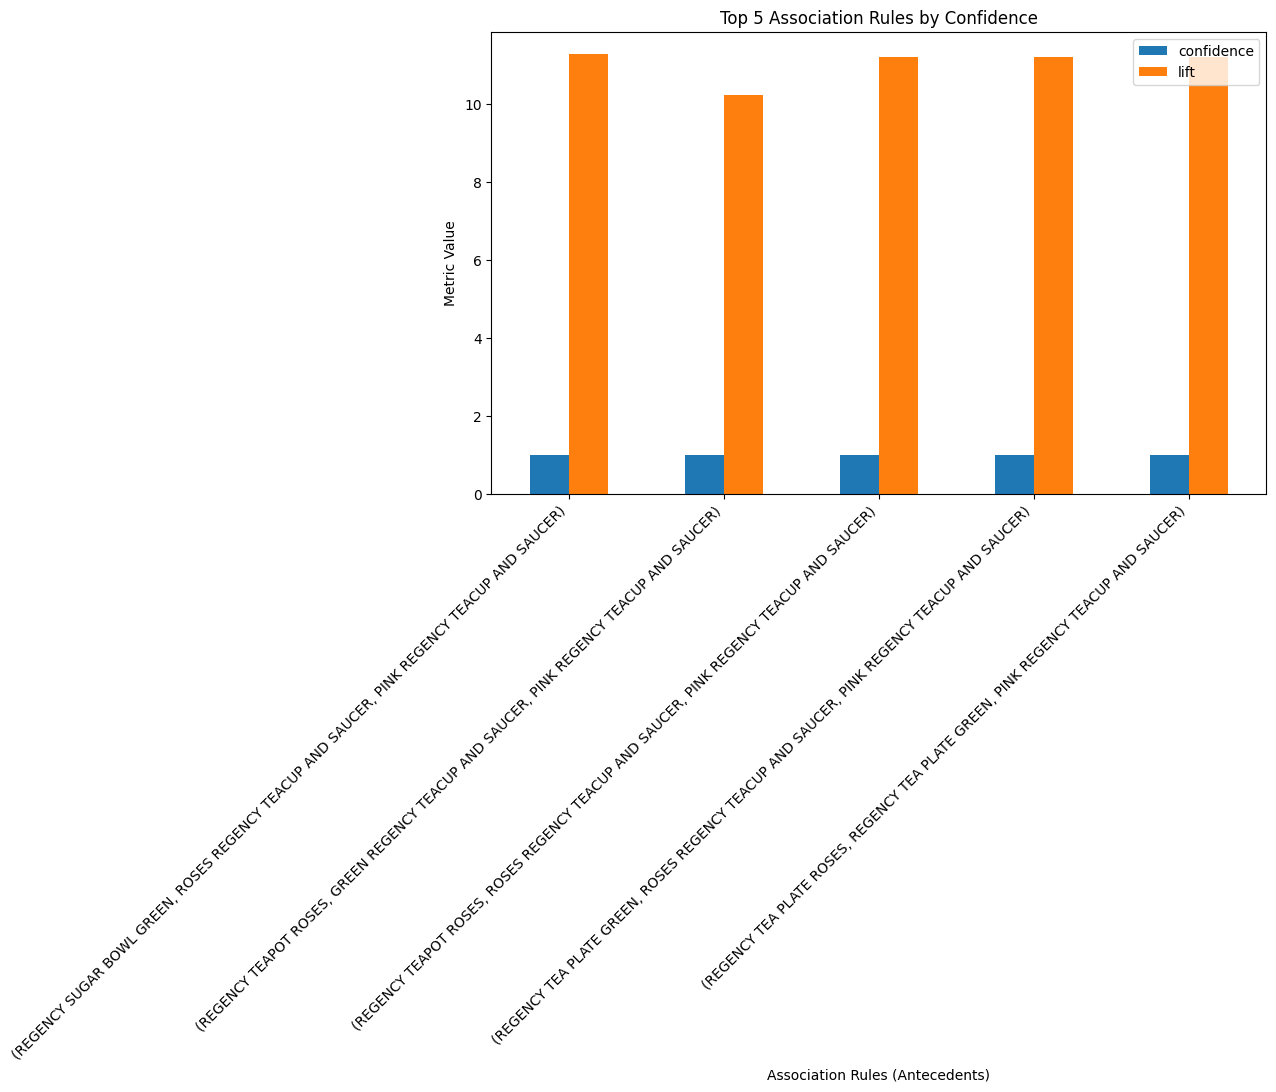

In [35]:
top_rules = selected_df.sort_values(by='confidence', ascending=False).head(5)

# Plot a bar chart for the top 5 rules
fig, ax = plt.subplots(figsize=(10, 6))
top_rules.plot(
    kind='bar', 
    x='antecedents', 
    y=['confidence', 'lift'], 
    ax=ax
)

# Set labels and title
ax.set_xlabel("Association Rules (Antecedents)")
ax.set_ylabel("Metric Value")
ax.set_title("Top 5 Association Rules by Confidence")

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [36]:
# Top 3 rules 

top_rules.head(3)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
24361,"(REGENCY SUGAR BOWL GREEN, ROSES REGENCY TEACU...",(GREEN REGENCY TEACUP AND SAUCER),0.026297,0.088667,0.026297,1.000000,11.278215,0.023966,inf,0.935946
24513,"(REGENCY TEAPOT ROSES, GREEN REGENCY TEACUP AN...",(ROSES REGENCY TEACUP AND SAUCER),0.030486,0.097044,0.030254,0.992366,10.225896,0.027295,118.287177,0.930579
24514,"(REGENCY TEAPOT ROSES, ROSES REGENCY TEACUP AN...",(GREEN REGENCY TEACUP AND SAUCER),0.030486,0.088667,0.030254,0.992366,11.192122,0.027551,119.384687,0.939287


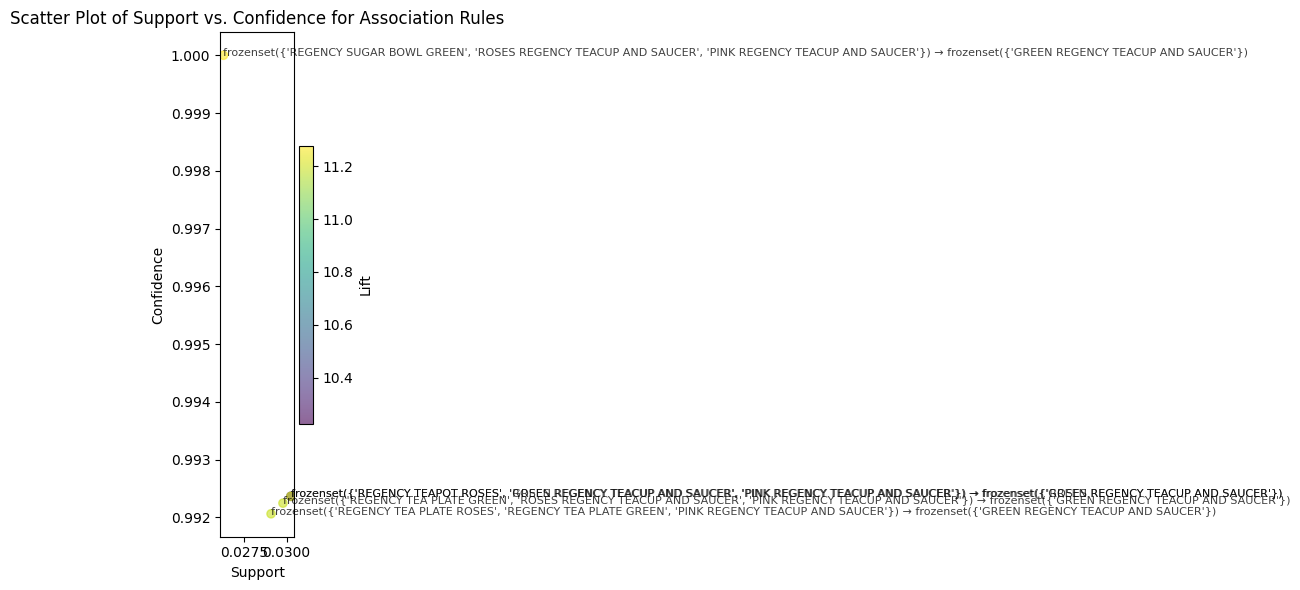

In [39]:
# Scatter plot of support vs. confidence
plt.figure(figsize=(10, 6))
plt.scatter(top_rules['support'], top_rules['confidence'], 
            alpha=0.6, c=top_rules['lift'], cmap='viridis')

plt.colorbar(label='Lift') 

# Label each point with its rule (antecedents -> consequents)
for i in range(len(top_rules)):
    rule_label = f"{top_rules['antecedents'].iloc[i]} → {top_rules['consequents'].iloc[i]}"
    
    plt.annotate(rule_label, (top_rules['support'].iloc[i], 
                              top_rules['confidence'].iloc[i]), 
                 fontsize=8, alpha=0.75)

# Set labels and title
plt.xlabel("Support")
plt.ylabel("Confidence")
plt.title("Scatter Plot of Support vs. Confidence for Association Rules")
plt.tight_layout()
plt.show()

------

With this, we draw a close to our multiverse adventure and head back to our original world.



Hope this exercise helped you learn something new and hone your skills as a Data Analyst!



Until next time :)